# Part $\mathcal{I}$ : [50%] - 1.2 Filtered Boston housing and kernels

## 1.2 - Filtered Boston housing and kernels: Question 4

### Question 4.(a)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

def load_dataframe(filename='Boston-filtered.csv'):
    """ 
    Loads the desired dataframe

    Parameters
    ----------
    filename : str
        Name of the csv file containing the dataset.

    Returns
    -------
    df : pandas.Dataframe
        Dataframe containing the data we want to study.
    """

    df = pd.read_csv("Boston-filtered.csv")
    return df

def train_test_split_indexes(dataframe):
    """ 
    Splits the dataframe randomly into two dataframes: one for train (containing 2/3 of the data) and 
    one for test (containing 1/3 of the data)

    Parameters
    ----------
    dataframe : pandas.Dataframe
        Contains the original data

    Returns
    -------
    train_dataframe : pandas.Dataframe
        Training data (~ 2/3 of the data)
    test_dataframe : pandas.Dataframe
        Testing data (~ 2/3 of the data)
    """

    # Defining sets to store the indexes, so when random numbers are sampled,
    # we insure in counts only new indexes
    train_indexes = set()
    test_indexes = set()

    while len(train_indexes) < (2*len(dataframe)/3):
        # Generating a random index
        new_index = random.randint(0, len(dataframe)-1)
        # Storing the random index inside the set. It won't have any
        # impact if the index already exists inside the set
        train_indexes.add(new_index)
    
    # Iterating over all indexes to find remaining indexes and store them
    # into the other set of indexes
    for index in range(len(dataframe)):
        if index not in train_indexes:
            test_indexes.add(index)

    # Converting the sets to lists
    train_indexes = list(train_indexes)
    test_indexes = list(test_indexes)

    # Creating the dataframe by storing the lines from the respective index sets
    train_dataframe = dataframe.loc[train_indexes]
    test_dataframe = dataframe.loc[test_indexes]

    return train_dataframe, test_dataframe


df = load_dataframe()
print(df.head(5))

      CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0    2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0    2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


/Users/raphaelyana/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Baseline Model - Naive Regression

In [ ]:
def naive_bayes(y_train, y_test):
    """
    Perfoms the naive bayes regression over the given dataset

    Parameters
    ----------
    y_train : pandas.Series
        Training set on which we perform the Naive Bayes regression
    y_test : pandas.Series
        Test set on which we perform the Naive Bayes regression

    Returns
    -------
    y_train_predicted : pandas.Series
        Predicted values for the training set
    y_test_predicted : pandas.Series
        Predicted values for the test set
    """

    # Initializing vectors of ones
    vec1_train = np.ones(len(y_train))
    vec1_test = np.ones(len(y_test))

    # In the Naive Bayes regression, the weights are the average of the training data
    weights = y_train.mean()
    
    # Predicting the values by simply returning for each of the train and test dataset
    # the average of the training data
    y_train_predicted = pd.Series(weights*vec1_train, index=y_train.index)
    y_test_predicted = pd.Series(weights*vec1_test, index=y_test.index)

    return y_train_predicted, y_test_predicted


def mse_naive(y_train, y_test, y_pred_train, y_pred_test):
    """ 
    Calculating the MSE of the predicted data compared to the ground truth for both Training and Test datasets

    Parameters
    ----------
    y_train : pd.Series
        Training dataset values
    y_test : pd.Series
        Testing dataset values
    y_pred_train : pd.Series
        Predicted values for training
    y_pred_test : pd.Series
        Predicted values for testing
    Returns
    -------
    mse_train_naive : float
        MSE of the training dataset
    mse_test_naive : float
        MSE of the test dataset
    """
    
    # Calculating the mean squared error for training
    mse_train_naive = (1/(len(y_train))) * np.sum((y_pred_train - y_train)**2)

    # Calculating the mean squared error for testing
    mse_test_naive = (1/len(y_test)) * np.sum((y_pred_test - y_test)**2)

    return mse_train_naive, mse_test_naive


# Initializing lists to store the training and testing MSE results for each run
mse_train_naive = []
mse_test_naive = []

# Running 20 times the algorithm, with each time a new train-test split performed
for i in range(20):

    # Splitting the data into train and test dataframes
    train_df, test_df = train_test_split_indexes(df)

    #The price we want to predict is the column ['MEDV]
    y_train_truth, y_test_truth = train_df['MEDV'], test_df['MEDV']

    # Predicting the values using the Naive Bayes regression
    y_train_naive, y_test_naive = naive_bayes(y_train_truth, y_test_truth)

    # Calculating the MSE for training and testing
    mse_train_naive_i, mse_test_naive_i = mse_naive(y_train_truth, y_test_truth, y_train_naive, y_test_naive)
    mse_train_naive.append(mse_train_naive_i)
    mse_test_naive.append(mse_test_naive_i)
    
print("MSE of Train dataset : ", mse_train_naive)
print("MSE of Test dataset : ", mse_test_naive)

# Calculating the mean over the 20 runs of the MSE for training and testing
mean_mse_train_naive = np.mean(mse_train_naive)
mean_mse_test_naive = np.mean(mse_test_naive)

print("Mean MSE of Train dataset : ", mean_mse_train_naive)
print("Mean MSE of Test dataset : ", mean_mse_test_naive)

MSE of Train dataset :  [85.52728125765904, 89.8752813276846, 91.57074752284583, 85.22018880641436, 74.34009637267602, 89.51975000875318, 82.38912686880711, 83.12390532544377, 78.86197507090087, 86.70343195266273, 77.73545148979376, 85.2412531073842, 86.28994231644549, 80.82451533559748, 81.1635180841007, 88.73428110010154, 87.99546339413887, 82.12545367809251, 83.37502398375406, 84.224633241133]
MSE of Test dataset :  [82.25245176572783, 73.55900368217732, 70.04127065128772, 83.14905182474936, 104.7675494430467, 74.18801837670749, 88.80875140676348, 87.12668357283742, 95.87456973045161, 79.8687418991265, 98.30258598555137, 82.9111834944755, 80.79773660719496, 91.78305651562819, 91.16669183418612, 75.73945023266825, 77.58551927703611, 89.19214916777959, 86.68763310274917, 84.95487788876271]


### Question 4.(c)

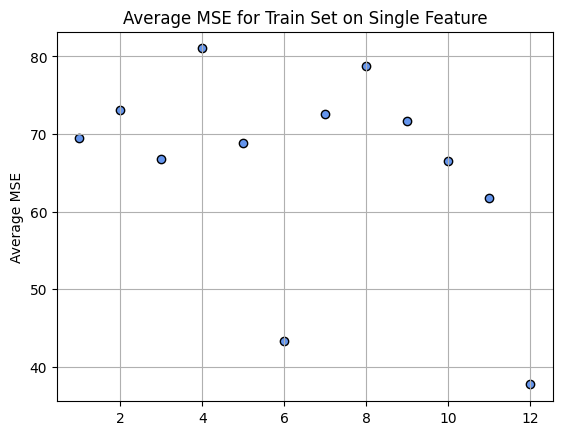

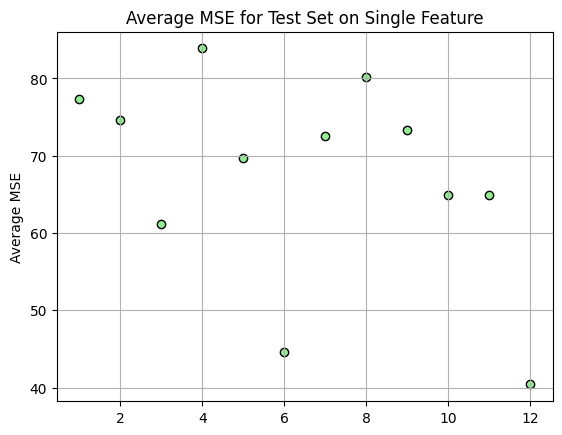

In [ ]:
def linear_regression_sf(dataframe, y_data, x_feature: str): 
    """
    Performs the linear regression taking as x_data a single feature of the dataframe,
    and as y coordinates the value we want to predict (in our case, the ['MEDV'] column)
 
    Parameters
    ----------
    dataframe : pd.Series
        The dataframe (training dataset) on which we perform the linear regression with a single feature.
    y_data : pd.series
        Ground truth values of the data we want to predict
    x_feature : str
        Name of the column we will use as x-coordinate for the regression

    Returns
    -------
    coefficients_feature_regression : np.ndarray
        Contains the coefficients of the 
    """
    
    # Ensuring we can use hstack to add another column
    x_train_feature = dataframe[x_feature].values.reshape(-1, 1)
    # Augmenting the data to permit the calculation of the bias term
    augmented_x_train_feature = np.hstack((x_train_feature, np.ones((len(x_train_feature), 1))))

    # Taking only the values of the target column
    y_values = y_data.values

    # Calculating the coefficients of the regression
    coefficients_feature_regression = np.linalg.solve(augmented_x_train_feature.T @ augmented_x_train_feature, augmented_x_train_feature.T @ y_values)
    
    return coefficients_feature_regression

def predict_y_values(dataframe, coeffs, x_feature: str):
    """
    Predicts the values for the testing dataset
 
    Parameters
    ----------
    dataframe : pd.Series
        The dataframe (testing dataset) on which we predict its values.
    coeffs : np.ndarray
        Coefficients calculated for the fitted model
    x_feature : str
        Name of the column we will use as x-coordinate for the regression

    Returns
    -------
    y_values_predicted : np.ndarray
        Contains the predicted values for the test dataset
    """

    # Adding a column of ones on the x_feature column to permit the bias term to be used in the prediction
    x_feature_predict = dataframe[x_feature].values.reshape(-1, 1)
    x_data_augmented = np.hstack((x_feature_predict, np.ones((len(x_feature), 1))))

    # Predicting the values of the dataset
    y_values_predicted = x_data_augmented @ coeffs

    return y_values_predicted


def mse_function(y_truth, y_predicted):
    """
    Calculates the MSE of the predicted data with respect to the ground truth data

    Parameters
    ----------
    y_truth : np.ndarray
        Contains the true values of the data (the house prices)
    y_predicted : np.ndarray
        Contains the predicted values for the data (predicted house prices)

    Returns
    -------
    mse_value : float
        MSE of the predicted data
    """

    # Calculating the MSE of the predicted data
    mse_value = np.mean((y_truth - y_predicted)**2)

    return mse_value


# Initializing the lists to contain the MSE lists of the predicted data for each column
# => element 1 will be the list of the 20 MSE obtained for predicting house price using column 1 
# (with index 0 obviously)
mse_train_linear = []
mse_test_linear = []

# Outer loop iterating in the dataframe for each feature (except the one we want to predict)
for col in df.drop(columns=['MEDV']).columns[:]:

    # Initializing the lists containing all the mse for current col (column) of outer loop iteration
    mse_train_col = []
    mse_test_col = []

    for _ in range(20):
        # Train test split
        train_df, test_df = train_test_split_indexes(df)
        y_train_truth, y_test_truth = train_df['MEDV'], test_df['MEDV']

        # Linear regression
        coefficients = linear_regression_sf(train_df, y_train_truth, col)

        # Prediction of y train and y test
        y_train_predicted = predict_y_values(train_df, coefficients, col)
        y_test_predicted = predict_y_values(test_df, coefficients, col)

        # MSE of training dataset
        mse_train_i = mse_function(y_train_truth, y_train_predicted)
        mse_test_i = mse_function(y_test_truth, y_test_predicted)

        # Appending the current MSE to the current column MSE list
        mse_train_col.append(mse_train_i)
        mse_test_col.append(mse_test_i)

    # Appending the list of mse to the overall list
    mse_train_linear.append(mse_train_col)
    mse_test_linear.append(mse_test_col)

# Calculating the mean MSE over the 20 iterations for each column
mean_mse_train_linear = np.mean(mse_train_linear, axis=1)
mean_mse_test_linear = np.mean(mse_test_linear, axis=1)

labels = df.drop(columns=['MEDV']).columns[:]
scatter_x = np.arange(1, len(labels)+1)


# Plotting the results obtained

plt.figure()
plt.scatter(scatter_x, mean_mse_train_linear,  c='cornflowerblue', edgecolors='black', label=labels)
plt.title("Average MSE for Train Set on Single Feature")
plt.ylabel("Average MSE")
plt.grid()
plt.savefig("Part 1 Figures/mse_sf_train.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure()
plt.scatter(scatter_x, mean_mse_test_linear, c='lightgreen', edgecolors='black', label=labels)
plt.title("Average MSE for Test Set on Single Feature")
plt.ylabel("Average MSE")
plt.grid()
plt.savefig("Part 1 Figures/mse_sf_test.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

### Q4.(d) - Linear Regression using all attributes

In [ ]:
def linear_regression_allfeat(dataframe, y_data):
    """ 
    Performing the linear regression using all the columns (except the one we try to predict) 

    Parameters
    ----------
    dataframe : pandas.Dataframe
        Training dataframe used for the regression
    y_data : pandas.Series
        Column containing the prices ground truth of the house prices

    Returns
    -------
    coefficients_feature_regression : np.ndarray
        Array containing all the coefficients of the fitted model
    """

    # Preparing our data used in the model by adding a column of 1s for the bias term
    x_data = dataframe.drop(columns=['MEDV']).values
    augmented_x_train_feature = np.hstack((x_data, np.ones((len(x_data), 1))))
    y_values = y_data.values

    # Calculating the coefficients of the regression
    coefficients_feature_regression = np.linalg.solve(augmented_x_train_feature.T @ augmented_x_train_feature, augmented_x_train_feature.T @ y_values)
    
    return coefficients_feature_regression

def predict_y_values_allfeat(dataframe, coeffs):
    """
    Predict the values of the given test dataframe using the coefficients of the regression using all features
    performed in the previous function.
    
    Parameters
    ----------
    dataframe : pandas.Dataframe
        Testing dataframe used for predictions
    coeffs : np.ndarray
        Array containing the coefficients of the fitted model

    Returns
    -------
    y_values_predicted : np.ndarray
        Array containing the predicted values for the housing price
    """

    x_feature = dataframe.drop(columns=['MEDV']).values
    x_data_augmented = np.hstack((x_feature, np.ones((len(x_feature), 1))))
    y_values_predicted = x_data_augmented @ coeffs

    return y_values_predicted


# Initializing the final list containing all MSE for training and testing datasets
mse_train_allfeat = []
mse_test_allfeat = []

for _ in range(20):
    # Train test split
    train_df, test_df = train_test_split_indexes(df)
    y_train_truth, y_test_truth = train_df['MEDV'], test_df['MEDV']

    # Regression performed using all features
    coefficients = linear_regression_allfeat(train_df, y_train_truth)

    # Calculating the predicted values for training and testing dataset of 
    # current iteration
    y_train_predicted = predict_y_values_allfeat(train_df, coefficients)
    y_test_predicted = predict_y_values_allfeat(test_df, coefficients)

    # Calculating the current iteration mse for training and test
    mse_train_allfeat_i = mse_function(y_train_truth, y_train_predicted)
    mse_test_allfeat_i = mse_function(y_test_truth, y_test_predicted)

    # Storing the calculated MSEs of current iteration
    mse_train_allfeat.append(mse_train_allfeat_i)
    mse_test_allfeat.append(mse_test_allfeat_i)

# Printing the list of MSE obtained for the 'All Feature' model
print("The list of MSE of Train Data using all features : ", mse_train_allfeat)
print("The list of MSE of Test Data using all features : ", mse_train_allfeat)

# Calculating the mean of the MSE using all features
mean_mse_train_allfeat = np.mean(mse_train_allfeat)
mean_mse_test_allfeat = np.mean(mse_test_allfeat)

print("The mean MSE of Train Data using all features: ", mean_mse_train_allfeat)
print("The mean MSE of Test Data using all features: ", mean_mse_test_allfeat)

The mean MSE of Train Data using all features:  21.89878689141303
The mean MSE of Test Data using all features:  24.7044892892393


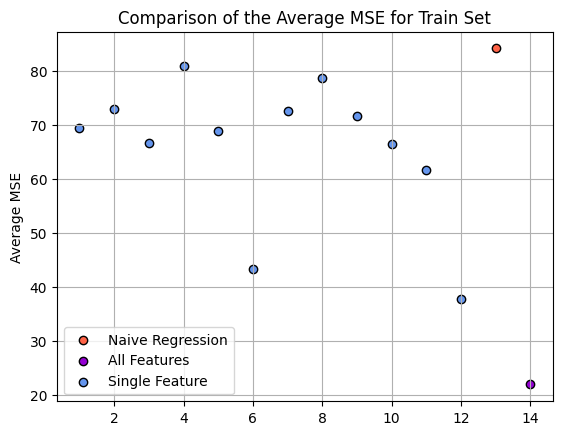

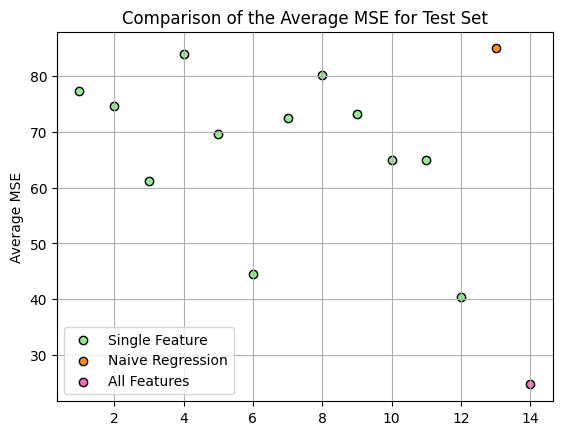

In [ ]:
# Plotting a comparison of all the models used for the prediction

plt.figure()
plt.grid()
plt.scatter((scatter_x[-1]+1), mean_mse_train_naive, c='tomato', edgecolors='black', label='Naive Regression')
plt.scatter((scatter_x[-1]+2), mean_mse_train_allfeat, c='darkviolet', edgecolors='black', label='All Features')
plt.scatter(scatter_x, mean_mse_train_linear,  c='cornflowerblue', edgecolors='black', label="Single Feature")
plt.title("Comparison of the Average MSE for Train Set")
plt.ylabel("Average MSE")
plt.legend()
plt.savefig("Part 1 Figures/comparison_mse_train.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure()
plt.grid()
plt.scatter(scatter_x, mean_mse_test_linear, c='lightgreen', edgecolors='black', label="Single Feature")
plt.scatter((scatter_x[-1]+1), mean_mse_test_naive, c='darkorange', edgecolors='black', label='Naive Regression')
plt.scatter((scatter_x[-1]+2), mean_mse_test_allfeat, c='hotpink', edgecolors='black', label='All Features')
plt.title("Comparison of the Average MSE for Test Set")
plt.ylabel("Average MSE")
plt.legend()
plt.savefig("Part 1 Figures/comparison_mse_test.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

## 1.3 - Kernelised Ridge Regression: Question 5

### Question 5.(a)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

def gauss_kernel(x_i, x_j, sigma):
    """
    Gaussian kernel calculation for two given inputs x_i and x_j, and a given sigma

    Parameters
    ----------
    x_i : np.ndarray
        First vector of data
    x_j : np.ndarray
        Second vector of data
    sigma : float
        The corresponding parameter of the Gaussian kernel

    Returns
    -------
    k_ij : np.ndarray
        Calculated Gaussian kernel for the given vectors
    """

    # Finding the length of each vector
    i_length, j_length = np.shape(x_i)[0], np.shape(x_j)[0]
    # Creating the matrix storing the kernel elements
    k_ij = np.zeros((i_length, j_length)) 
    
    # Iterating over each vector
    for i in range(i_length):
        for j in range(j_length):
            
            # Applying the Gaussian kernel formula
            diff = x_i[i] - x_j[j]
            sqdist = np.dot(diff, diff)
            k_ij[i, j] = np.exp(-sqdist / (2 * sigma**2))

    return k_ij

# Loading the dataframe
df = load_dataframe()

# Creating the sets containing the values of gamma and sigma
range_power_gam = np.flip(np.arange(26, 41))
range_power_sig = np.arange(7, 13.5, 0.5)
gamma_set = [(1/2**i) for i in range_power_gam]
sigma_set = [(2**i) for i in range_power_sig]

# Train test split
train_df, test_df = train_test_split_indexes(df)

# Defining the training x-data (the features used to predict) 
# and y-data (the feature we want to predict)
X_train = train_df.drop(columns=['MEDV']).values
Y_train = train_df['MEDV'].values

# Same for test dataframe
X_test = test_df.drop(columns=['MEDV']).values
Y_test = test_df['MEDV'].values

# Initializing the matrix containing each average MSE for given values of 
# gamma and sigma, and the dictionary to store the best parameters.
average_mse = np.zeros((len(gamma_set), len(sigma_set)))
best_parameters = {'error': np.inf, 'sigma': None, 'gamma': None}

# Iterating over each values of gamma and sigma
for g_i, gamma in enumerate(gamma_set):
    for s_i, sigma in enumerate(sigma_set):

        # Initializing the error list that will store all the errors for the folds
        # given current gamma and sigma
        error_cross_validation = []
        
        # Five-fold cross-validation to choose among all pairing of the values of γ and σ.
        for train_index, validation_index in KFold(n_splits=5, shuffle=True, random_state=42).split(X_train):
            
            # defining the train data
            x_train = X_train[train_index]
            y_train = Y_train[train_index]

            # calculating the corresponding kernel of the train data with itself
            kernel_train = gauss_kernel(x_train, x_train, sigma)

            # Defining the validation data
            x_validation = X_train[validation_index]
            y_validation = Y_train[validation_index]

            # calculating the corresponding kernel between training data and validation data
            kernel_validation = gauss_kernel(x_train, x_validation, sigma)

            # calculating the current l value
            current_l = np.shape(kernel_train)[0]
            # Finding the alpha value
            current_alpha = np.linalg.solve(kernel_train + gamma*current_l*np.identity(current_l), y_train)

            # predicting the y values
            y_predicted = np.dot(kernel_validation.T, current_alpha)

            # calculating the mse of the current fold
            mse_fold = mse_function(y_validation, y_predicted)
            error_cross_validation.append(mse_fold)

        # calculating the mean of the errors
        current_mse = np.mean(error_cross_validation)
        # storing them
        average_mse[g_i, s_i] = current_mse

        # updating the best parameters if needed
        if current_mse < best_parameters['error']:
            best_parameters['error'] = current_mse
            best_parameters['sigma'] = sigma
            best_parameters['gamma'] = gamma

# retrieving the final best gamma and best sigma values
best_sigma, best_gamma = best_parameters['sigma'], best_parameters['gamma']

# printing them out
print("The best parameters found: \n\nBest sigma : ", best_sigma, "\nBest gamma : ", best_gamma)


KeyboardInterrupt: 

### Question 5.(b) - Plotting the cross validation results

A 3D surface plot was the simplest method

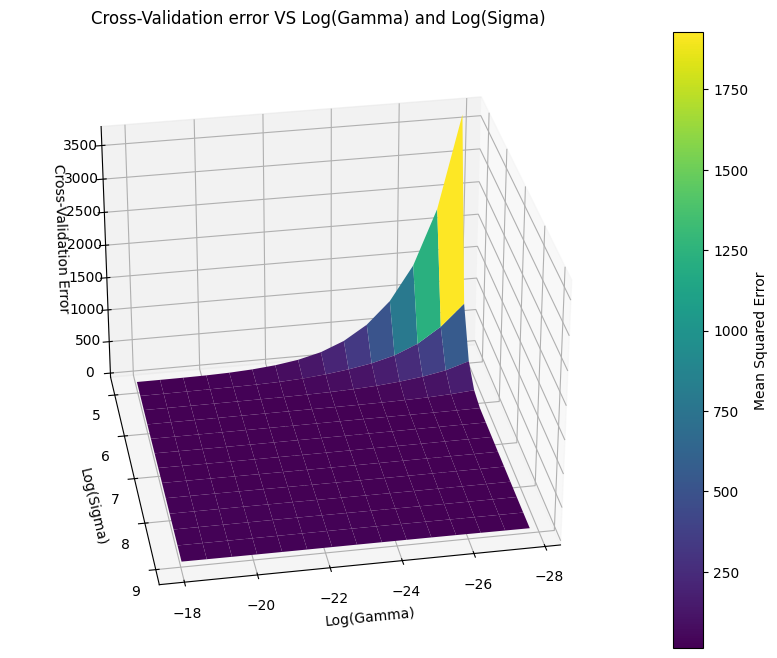

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

gamma_values, sigma_values = np.meshgrid(gamma_set, sigma_set, indexing='ij')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(np.log(gamma_values), np.log(sigma_values), average_mse, cmap='viridis')
fig.colorbar(surf, ax=ax, label='Mean Squared Error')
ax.set_xlabel("Log(Gamma)")
ax.set_ylabel("Log(Sigma)")
ax.set_zlabel("Cross-Validation Error")
ax.set_title("Cross-Validation error VS Log(Gamma) and Log(Sigma)")
ax.view_init(elev=30, azim=80)
plt.savefig("3Dplot_gamma_sigma.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

### Question 5.(c) - MSE on training and test set

In [ ]:
##### TRAIN SET ######

# Retrieving the best gamma and best sigma parameters we found
best_sigma, best_gamma = best_parameters['sigma'], best_parameters['gamma']

# Calculating the gaussian kernel of the training data using the best sigma
kernel_train_best = gauss_kernel(X_train, X_train, best_sigma)

# l value
l = np.shape(kernel_train_best)[0]

# Calculating alpha value
alpha = np.linalg.solve(kernel_train_best + best_gamma*l*np.identity(l), Y_train)

# Predicting the values of training data
y_train_pred = np.dot(kernel_train_best, alpha)



##### TEST SET ######

# Kernel of training and test data, using best parameters
kernel_test_best = gauss_kernel(X_train, X_test, best_sigma)

# Predicting test values
y_test_predicted = np.dot(kernel_test_best.T, alpha)



###### MSE Calculations #####

# Calculating the mse of training and test sets, and displaying them
train_error = mse_function(Y_train, y_train_pred)
test_error = mse_function(Y_test, y_test_predicted)

print("The best parameters found: \n\nBest sigma : ", best_sigma, "\nBest gamma : ", best_gamma)
print("Training error: ", train_error)
print("Test error: ", test_error)

The best parameters found: 

Best sigma :  512.0 
Best gamma :  3.725290298461914e-09
Training error:  8.246895113119416
Test error:  11.16274418344245


### Question 5.(d) - Kernel Ridge Regression

Repeat “exercise 4a,c,d” and “exercise 5a,c” over 20 random (2/3, 1/3) splits of your data. Record the train/test error and the standard deviations (σ′) of the train/test errors and summarise these
results in the following type of table.

In [ ]:
def kernel_ridge_regression(train_df,
                            test_df, 
                            ):
    """ 
    Performing the kernel ridge regression to find best parameters.

    Parameters
    ----------
    train_df : pandas.Dataframe
        Training dataframe where we will use all the columns to predict the ['MEDV'] column
    test_df : pandas.Dataframe
        Testing dataframe where we will use all the columns to predict the ['MEDV'] column

    Returns
    ------- 
    best_parameters : dict
        Contains the best sigma and gamma, and the error using these parameters
    mse_train : float
        MSE of the model fitted to the training data
    mse_test : float
        MSE of the model fitted to the training data and used on testing dataset
    """
    
    # Initializing the dict containing the best parameters
    best_parameters = {'error': np.inf, 'sigma': None, 'gamma': None}

    # Preparing the train and test data
    X_train = train_df.drop(columns=['MEDV']).values
    Y_train = train_df['MEDV'].values
    X_test = test_df.drop(columns=['MEDV']).values
    Y_test = test_df['MEDV'].values

    # Preparing the values of gamma and sigma
    range_power_gam = np.flip(np.arange(26, 41))
    range_power_sig = np.arange(7, 13.5, 0.5)
    gamma_set = [(1/2**i) for i in range_power_gam]
    sigma_set = [(2**i) for i in range_power_sig]

    # Initializing the average MSE matrix
    average_mse = np.zeros((len(gamma_set), len(sigma_set)))


    for g_i, gamma in enumerate(gamma_set):
        for s_i, sigma in enumerate(sigma_set):

            error_cross_validation = []

            for train_index, validation_index in KFold(n_splits=5, shuffle=True, random_state=42).split(X_train):
                # Preparing train data
                x_train = X_train[train_index]
                y_train = Y_train[train_index]

                # Train kernel
                kernel_train = gauss_kernel(x_train, x_train, sigma)
                
                # Preparing validation data
                x_validation = X_train[validation_index]
                y_validation = Y_train[validation_index]

                # Validation kernel
                kernel_validation = gauss_kernel(x_train, x_validation, sigma)
                
                current_l = np.shape(kernel_train)[0]
                current_alpha = np.linalg.solve(kernel_train + gamma*current_l*np.identity(current_l), y_train)
    
                # Predicting y
                y_predicted = np.dot(kernel_validation.T, current_alpha)
    
                # MSE of the current fold
                mse_fold = mse_function(y_validation, y_predicted)
                error_cross_validation.append(mse_fold)
            
            # Calculating the mean error of cross_validation
            current_mse = np.mean(error_cross_validation)
            average_mse[g_i, s_i] = current_mse

            # Updating the best parameters
            if current_mse < best_parameters['error']:
                best_parameters['error'] = current_mse
                best_parameters['sigma'] = sigma
                best_parameters['gamma'] = gamma

    # Retrieving the best gamma and best sigma
    best_sigma, best_gamma = best_parameters['sigma'], best_parameters['gamma']

    # Calculating the train kernel and predicting the train target values
    kernel_train_best = gauss_kernel(X_train, X_train, best_sigma)
    l = np.shape(kernel_train_best)[0]
    alpha = np.linalg.solve(kernel_train_best + best_gamma*l*np.identity(l), Y_train)
    y_train_pred = np.dot(kernel_train_best, alpha)
    
    # Calculating test kernel and predicting the labels
    kernel_test_best = gauss_kernel(X_train, X_test, best_sigma)
    y_test_predicted = np.dot(kernel_test_best.T, alpha)

    # Calculating the MSE for train and test
    mse_train = mse_function(Y_train, y_train_pred)
    mse_test = mse_function(Y_test, y_test_predicted)

    return best_parameters, mse_train, mse_test

def run_kernel_ridge(df):
    """ 
    Running the kernel ridge regression for 20 trials, and recording the best parameters everytime.

    Parameters
    ----------
    df : pandas.Dataframe
        The original dataframe containing all the data as an input
    Returns
    -------
    all_best_parameters : list
        List of dictionaries containing the lowest error and the corresponding best gamma
        and best sigma for a given run
    mse_train_list : list 
        List of the corresponding MSE of train set for each kernel ridge regression
    mse_test_list : list
        List of the corresponding MSE of test set for each kernel ridge regression
    """

    all_best_parameters = []
    mse_train_list = []
    mse_test_list = []

    for run in range(20):
        print("Starting run : ", run)
        train_df, test_df = train_test_split_indexes(df)
        best_parameters, mse_train, mse_test = kernel_ridge_regression(train_df, test_df)
        all_best_parameters.append(best_parameters)
        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
        print("MSE train at run ", run, ": ", mse_train)
        print("MSE test at run ", run, ": ", mse_test, "\n")

    return all_best_parameters, mse_train_list, mse_test_list


# Initializing the labels, to have t
labels = df.drop(columns=['MEDV']).columns[:]
scatter_x = np.arange(1, len(labels)+1)

# Calculating the best parameters and mse (train and test) for the dataframe
all_best_parameters, kernel_mse_train_list, kernel_mse_test_list = run_kernel_ridge(df)

# Preparing the labels to save them to the csv file
methods = ["Naive Regression"]
for i in range(1, len(labels)+1):
    methods.append(f"Linear Regression (Attribute {i})")
methods.append("Linear Regression (All Attributes)")
methods.append("Kernel Ridge Regression")

# Initializing the list containing all the MSE for training dataset
# Same for testing dataset
all_mse_train = [mse_train_naive]
all_mse_test = [mse_test_naive]

# Adding the mse for each linear feature regression in mse training and test lists
for feature_train_mse in mse_train_linear:
    all_mse_train.append(feature_train_mse)

for feature_test_mse in mse_test_linear:
    all_mse_test.append(feature_test_mse)

# Adding all the features linear regression results and Kernel Ridge Regression results
all_mse_train.append(mse_train_allfeat)
all_mse_train.append(kernel_mse_train_list)
all_mse_test.append(mse_test_allfeat)
all_mse_test.append(kernel_mse_test_list)

# Calculating the mean of each method's MSE results for training and test sets
methods_train_mean_mse = np.mean(all_mse_train, axis=1)
methods_test_mean_mse = np.mean(all_mse_test, axis=1)

# Calculating the standard deviation of each method's MSE results for training and test sets
methods_train_std_mse = np.std(all_mse_train, axis=1)
methods_test_std_mse = np.std(all_mse_test, axis=1)

# Creating a dataframe containing all the data
results_df = pd.DataFrame({
    "Method": methods,
    "Mean Train": methods_train_mean_mse,
    "Std Train": methods_train_std_mse,
    "Mean Test": methods_test_mean_mse,
    "Std Test": methods_test_std_mse
})

# Saving the obtained data to a CSV file, to avoid running everytime the cell
# because it takes some time for the whole data to be processed (~20min)
results_df.to_csv("method_comparison.csv", index=False)

Starting run :  0
MSE train at run  0 :  7.653196667743082
MSE test at run  0 :  12.656234658972213 

Starting run :  1
MSE train at run  1 :  11.85541568305019
MSE test at run  1 :  10.625987842183624 

Starting run :  2
MSE train at run  2 :  8.54882696754522
MSE test at run  2 :  10.356793713306876 

Starting run :  3
MSE train at run  3 :  7.856437926860176
MSE test at run  3 :  15.516593875130665 

Starting run :  4
MSE train at run  4 :  11.147271147664089
MSE test at run  4 :  13.160806029142654 

Starting run :  5
MSE train at run  5 :  7.922009758138649
MSE test at run  5 :  17.132093234470023 

Starting run :  6
MSE train at run  6 :  10.265971626762225
MSE test at run  6 :  8.837607470448702 

Starting run :  7
MSE train at run  7 :  7.9777773380092025
MSE test at run  7 :  14.801514202968395 

Starting run :  8
MSE train at run  8 :  5.183877245853083
MSE test at run  8 :  13.82068233226302 

Starting run :  9
MSE train at run  9 :  10.333725019222562
MSE test at run  9 :  

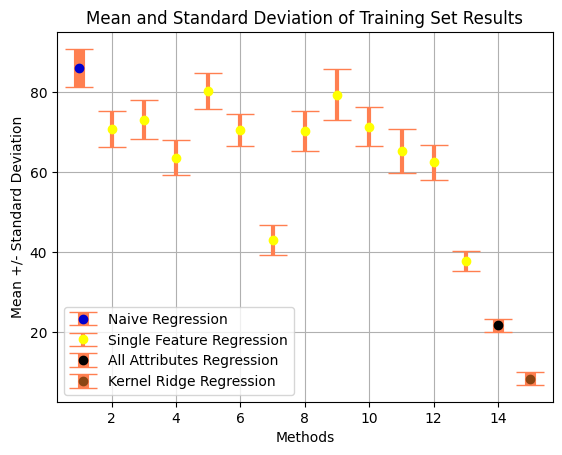

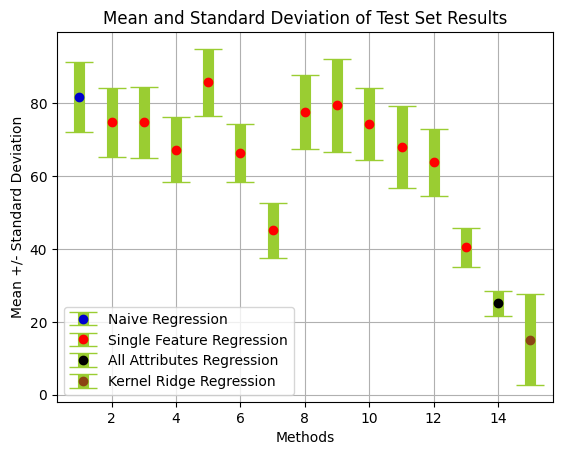

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Rereading the CSV file containing all the MSE means and standard deviation
results_df = pd.read_csv("method_comparison.csv")

# Identifying the columns
methods_train_mean_mse = results_df['Mean Train']
methods_test_mean_mse = results_df['Mean Test']
methods_train_std_mse = results_df['Std Train']
methods_test_std_mse = results_df['Std Test']

# Finding the maximum index
index_max = len(results_df['Method'])
indexes = np.arange(1, index_max+1)

# Plotting the error bar plots for the training and test sets
plt.figure()
plt.errorbar(indexes[0], methods_train_mean_mse[0], yerr=methods_train_std_mse[0], fmt='o', color='mediumblue', ecolor='coral', elinewidth=8, capsize=10, label='Naive Regression')
plt.errorbar(indexes[1:(index_max-2)], methods_train_mean_mse[1:(index_max-2)], yerr=methods_train_std_mse[1:(index_max-2)], fmt='o', color='yellow', ecolor='coral', elinewidth=8, capsize=10, label='Single Feature Regression')
plt.errorbar(indexes[index_max-2], methods_train_mean_mse[index_max-2], yerr=methods_train_std_mse[index_max-2], fmt='o', color='black', ecolor='coral', elinewidth=8, capsize=10, label='All Attributes Regression')
plt.errorbar(indexes[index_max-1], methods_train_mean_mse[index_max-1], yerr=methods_train_std_mse[index_max-1], fmt='o', color='saddlebrown', ecolor='coral', elinewidth=8, capsize=10, label='Kernel Ridge Regression')
plt.title('Mean and Standard Deviation of Training Set Results')
plt.xlabel('Methods')
plt.ylabel('Mean +/- Standard Deviation')
plt.grid()
plt.legend()
plt.savefig("methods_train.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure()
plt.errorbar(indexes[0], methods_test_mean_mse[0], yerr=methods_test_std_mse[0], fmt='o', color='mediumblue', ecolor='yellowgreen', elinewidth=8, capsize=10, label='Naive Regression')
plt.errorbar(indexes[1:(index_max-2)], methods_test_mean_mse[1:(index_max-2)], yerr=methods_test_std_mse[1:(index_max-2)], fmt='o', color='red', ecolor='yellowgreen', elinewidth=8, capsize=10, label='Single Feature Regression')
plt.errorbar(indexes[index_max-2], methods_test_mean_mse[index_max-2], yerr=methods_test_std_mse[index_max-2], fmt='o', color='black', ecolor='yellowgreen', elinewidth=8, capsize=10, label='All Attributes Regression')
plt.errorbar(indexes[index_max-1], methods_test_mean_mse[index_max-1], yerr=methods_test_std_mse[index_max-1], fmt='o', color='saddlebrown', ecolor='yellowgreen', elinewidth=8, capsize=10, label='Kernel Ridge Regression')
plt.title('Mean and Standard Deviation of Test Set Results')
plt.xlabel('Methods')
plt.ylabel('Mean +/- Standard Deviation')
plt.grid()
plt.legend()
plt.savefig("methods_test.png", format='png', dpi=300, bbox_inches='tight')
plt.show()